In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [32]:
# Read the Excel file
df = pd.read_csv("Loan_Eligibility.csv")

In [33]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
## Data Preprocessing

In [ ]:
# Removing Duplicate values and removing rows with high percentage of NaN values

In [42]:
df = df.drop_duplicates()  

In [50]:
missing_values = df.isnull().sum()

In [86]:
df.fillna(method = 'ffill', inplace = True)

C:\Users\CarDoZo\AppData\Local\Temp\ipykernel_11408\3916497771.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'ffill', inplace = True)


In [ ]:
# Converting Data types

In [53]:
df['Credit Score'] = df['Credit Score'].astype(int)
df['Loan Status'] = df['Loan Status'].astype('category')  # Convert to categorical

In [59]:
print(df.dtypes)

Loan ID                           object
Customer ID                       object
Loan Status                     category
Current Loan Amount                int64
Term                              object
Credit Score                       int64
Annual Income                    float64
Years in current job              object
Home Ownership                    object
Purpose                           object
Monthly Debt                     float64
Years of Credit History          float64
Months since last delinquent     float64
Number of Open Accounts          float64
Number of Credit Problems        float64
Current Credit Balance           float64
Maximum Open Credit              float64
Bankruptcies                     float64
Tax Liens                        float64
dtype: object


In [ ]:
# Removing Duplicates

In [60]:
df.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Distribution of Credit Scores')

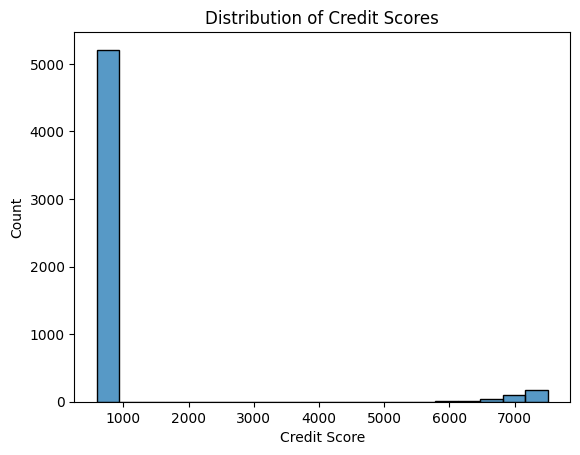

In [64]:
sns.histplot(df['Credit Score'], bins = 20)
plt.title('Distribution of Credit Scores')

Text(0.5, 1.0, 'Loan Status Distribution')

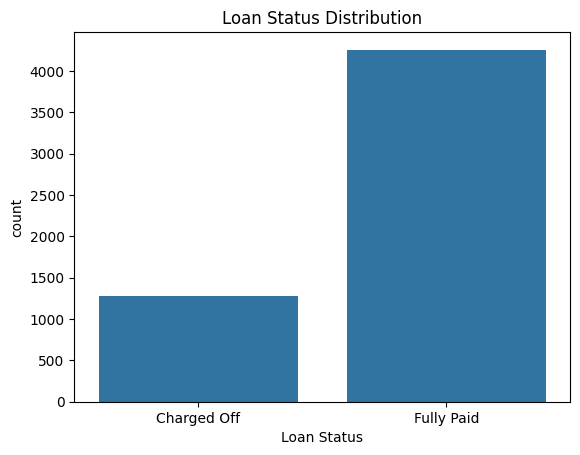

In [68]:
sns.countplot(x = 'Loan Status', data = df)
plt.title('Loan Status Distribution')

In [ ]:
# Correlation matrix

In [76]:
print(df.dtypes)

Loan ID                           object
Customer ID                       object
Loan Status                     category
Current Loan Amount                int64
Term                              object
Credit Score                       int64
Annual Income                    float64
Years in current job              object
Home Ownership                    object
Purpose                           object
Monthly Debt                     float64
Years of Credit History          float64
Months since last delinquent     float64
Number of Open Accounts          float64
Number of Credit Problems        float64
Current Credit Balance           float64
Maximum Open Credit              float64
Bankruptcies                     float64
Tax Liens                        float64
dtype: object


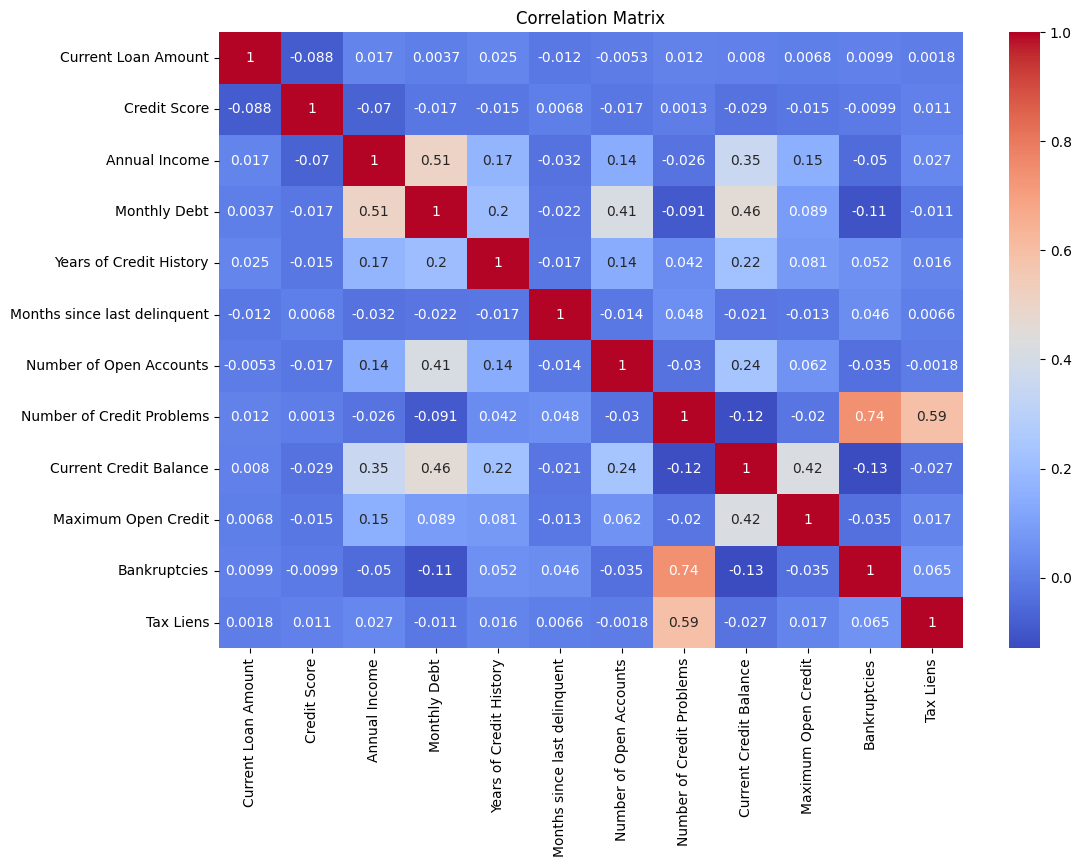

In [80]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [81]:
df['Debt_to_Income_Ratio'] = df['Monthly Debt'] / (df['Annual Income'] / 12)

In [82]:
df = pd.get_dummies(df, columns=['Home Ownership', 'Purpose'], drop_first=True)

In [92]:

from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [93]:
# If your dataset has categorical columns, use pd.get_dummies() to convert them to numerical format
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure that the columns in training and test sets match (if not, align them)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [94]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train_encoded)

# Predictions and evaluation
y_pred = model.predict(X_test_encoded)
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.22      0.35       257
           1       0.81      0.99      0.89       851

    accuracy                           0.81      1108
   macro avg       0.84      0.60      0.62      1108
weighted avg       0.82      0.81      0.76      1108



In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Encode the features if there are categorical features
X_train_encoded = pd.get_dummies(X_train)

# Define parameter grid for tuning Random Forest model
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize Random Forest model
model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train_encoded, y_train_encoded)

# Print best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Encode the features if there are categorical features
X_train_encoded = pd.get_dummies(X_train)

# Initialize Random Forest model
model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_encoded, y_train_encoded, cv=5)

# Print cross-validation scores and mean
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [0.80270575 0.81489842 0.81489842 0.79232506 0.81376975]
Mean CV score: 0.8077194795147363
